This notebook makes the figures looking at the donor's abundance of butyrate producers *relative to* the respective patient's abundance.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-white')
sns.set_palette('muted')

# Kump 2018

This is mostly copied from 2018-09-12.kump2018.explore_butyrate_producers.ipynb.

In [2]:
fbutyrate = '../../data/analysis/butyrate_producers.kump2018.txt'
butyrate_kump = pd.read_csv(fbutyrate, sep='\t')
butyrate_kump.head()

,sample_id,DonorID,PatientID,Sampling_day,Sampletype,prepost,Response,butyrate_abun
0,34.0,DB,PD,d-10,Patientstool,preABX,NR,0.231831
1,35.0,DB,PD,d1,Patientstool,postABX,NR,0.001431
2,36.0,DB,PD,d14,Patientstool,postFMT,NR,0.077806
3,37.0,DB,PD,d28,Patientstool,postFMT,NR,0.150282
4,38.0,DB,PD,d42,Patientstool,postFMT,NR,0.192591


From the previous notebook, it looks like we don't have enough data to compare the patient's pre-abx abundances with their donors'. (From the notebook: missing patient preABX data: donors DD, DE, DK, DL, DM; missing donor d1 data: patient that went with donor DF).

Let's look at the difference between the post-abx patient abundances and their respective donor at day 1.

In [3]:
pt_but = (
    butyrate_kump
        .query('Sampletype == "Patientstool"')
        .query('prepost == "postABX"')
        .query('DonorID != "Control"')
    )

donor_but = (
    butyrate_kump
        .query('Sampletype == "Donorstool"')
        .query('Sampling_day == "d1"')
    )

In [4]:
#donor_but = donor_but.rename(columns={'butyrate_abun': 'donor_butyrate'})
#pt_but = pt_but.rename(columns={'butyrate_abun': 'postabx_butyrate'})

mergecols = ['DonorID', 'PatientID', 'Response']

butyrate_kump = pd.merge(
    donor_but, pt_but, 
    left_on=mergecols, right_on=mergecols, 
    suffixes=['_donor', '_pt'], how='outer')

# Difference btw postabx and donor butyrate producer abun
butyrate_kump['donor_minus_pt'] = butyrate_kump['butyrate_abun_donor'] - butyrate_kump['butyrate_abun_pt']

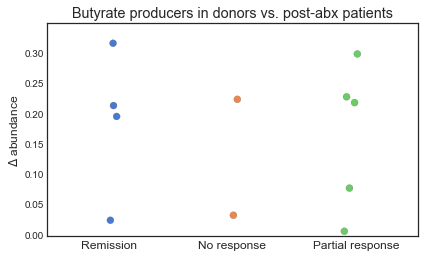

In [5]:
fig, ax = plt.subplots()

order=['RE', 'NR', 'PR']

sns.stripplot(data=butyrate_kump, x='Response', y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2)
ax.set_ylabel('$\Delta$ abundance', fontsize='large')

ax.set_xlabel('')
ax.set_xticklabels(['Remission', 'No response', 'Partial response'], fontsize='large')

ax.set_ylim([-0.003, None])

ax.set_title('Butyrate producers in donors vs. post-abx patients', fontsize='x-large')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('../../figures/final/supp1.butyrate_delta_abundance.kump2018.png', dpi=150)

# Jacob 2017

In [6]:
fbutyrate = '../../data/analysis/butyrate_producers.jacob2017.txt'
butyrate_jacob = pd.read_csv(fbutyrate, sep='\t')
butyrate_jacob.head()

,sample_id,sample_type,donor_patient,remission_w4,response_w4,patient_id,butyrate_abun
0,SRR5629088,donor,donor,No,No,1,0.168825
1,SRR5629089,W2,patient,No,No,7,0.366744
2,SRR5629090,donor,donor,No,No,2,0.142246
3,SRR5629091,W2,patient,No,No,5,0.162068
4,SRR5629092,W4,patient,No,No,3,0.248417


In [7]:
butyrate_jacob[['sample_type', 'donor_patient']].drop_duplicates()

,sample_type,donor_patient
0,donor,donor
1,W2,patient
4,W4,patient
9,Pre,patient


In [8]:
# This cell shows that all but 2 of the patients have 4 sample_types associated
# with their patient_id, corresponding to 'donor', 'Pre', 'W2', and 'W4'
butyrate_jacob.groupby(['patient_id', 'sample_type']).size().reset_index().groupby('patient_id').size().sort_values().head()

patient_id
1     3
31    3
29    4
28    4
27    4
dtype: int64

In [9]:
pt_but = (
    butyrate_jacob
        .query('sample_type == "Pre"')
    )

donor_but = (
    butyrate_jacob
        .query('sample_type == "donor"')
    )

mergecols = ['remission_w4', 'response_w4', 'patient_id']

butyrate_jacob = pd.merge(
    donor_but, pt_but, 
    left_on=mergecols, right_on=mergecols, 
    suffixes=['_donor', '_pt'], how='outer')

butyrate_jacob.head()

,sample_id_donor,sample_type_donor,donor_patient_donor,remission_w4,response_w4,patient_id,butyrate_abun_donor,sample_id_pt,sample_type_pt,donor_patient_pt,butyrate_abun_pt
0,SRR5629088,donor,donor,No,No,1,0.168825,NaN,NaN,NaN,NaN
1,SRR5629090,donor,donor,No,No,2,0.142246,SRR5629106,Pre,patient,0.354549
2,SRR5629098,donor,donor,No,No,3,0.164350,SRR5629097,Pre,patient,0.248789
3,SRR5629104,donor,donor,No,Yes,24,0.135703,SRR5629152,Pre,patient,0.099277
4,SRR5629107,donor,donor,No,Yes,4,0.130846,SRR5629112,Pre,patient,0.325555


In [10]:
# Difference btw patient and donor butyrate producer abun
butyrate_jacob['donor_minus_pt'] = butyrate_jacob['butyrate_abun_donor'] - butyrate_jacob['butyrate_abun_pt']

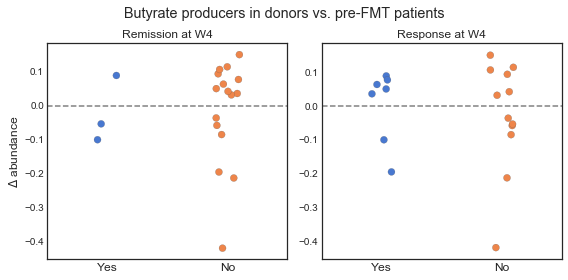

In [11]:
fig, AX = plt.subplots(1, 2, figsize=(8, 4))

order=['Yes', 'No']

col = 'remission_w4'
ax = AX[0]
sns.stripplot(data=butyrate_jacob, x=col, y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2, ax=ax)
ax.set_ylabel('$\Delta$ abundance', fontsize='large')

ax.set_xlabel('')
ax.set_xticklabels(['Yes', 'No'], fontsize='large')
ax.axhline(0, c='gray', linestyle='--')
ax.set_title('Remission at W4')

col = 'response_w4'
ax = AX[1]
sns.stripplot(data=butyrate_jacob, x=col, y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2, ax=ax)
ax.set_ylabel('')

ax.set_xlabel('')
ax.set_xticklabels(['Yes', 'No'], fontsize='large')
ax.axhline(0, c='gray', linestyle='--')
ax.set_title('Response at W4')

fig.suptitle('Butyrate producers in donors vs. pre-FMT patients', 
             fontsize='x-large', y=0.99)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('../../figures/final/supp1.butyrate_delta_abundance.jacob2017.png', dpi=150)

# Goyal 2018

In [12]:
fbutyrate = '../../data/analysis/butyrate_producers.goyal2018.txt'
butyrate_goyal = pd.read_csv(fbutyrate, sep='\t')
butyrate_goyal.head()

,sample_id,patient_id,sample_type,time_point,remission_m1,response_m1,remission_m6,response_m6,butyrate_abun
0,FMT.01.004.6M,4,6M,6_month,False,False,False,False,0.235075
1,FMT.01.004.D,4,D,donor,False,False,False,False,0.144642
2,FMT.01.004.M,4,M,1_month,False,False,False,False,0.203245
3,FMT.01.004.P,4,P,pre_fmt,False,False,False,False,0.286255
4,FMT.01.005.6M,5,6M,duplicate_sample,False,True,False,True,0.064388


In [13]:
butyrate_goyal[['sample_type', 'time_point']].drop_duplicates().sort_values(by='time_point')

,sample_type,time_point
2,M,1_month
36,WX,1_week
8,W,1_week
102,4M,4_month
5,6MX,6_month
0,6M,6_month
101,9M,9_month
1,D,donor
44,D2,donor
12,P,duplicate_sample


Ah yes, this data was messier so I added the `time_point` column to group things more easily.

In [14]:
pt_but = (
    butyrate_goyal
        .query('time_point == "pre_fmt"')
    )

donor_but = (
    butyrate_goyal
        .query('time_point == "donor"')
    )

mergecols = ['remission_m1', 'response_m1', 'remission_m6', 'response_m6',
             'patient_id']

butyrate_goyal = pd.merge(
    donor_but, pt_but, 
    left_on=mergecols, right_on=mergecols, 
    suffixes=['_donor', '_pt'], how='outer')

butyrate_goyal.head()

,sample_id_donor,patient_id,sample_type_donor,time_point_donor,remission_m1,response_m1,remission_m6,response_m6,butyrate_abun_donor,sample_id_pt,sample_type_pt,time_point_pt,butyrate_abun_pt
0,FMT.01.004.D,4,D,donor,False,False,False,False,0.144642,FMT.01.004.P,P,pre_fmt,0.286255
1,FMT.01.005.D,5,D,donor,False,True,False,True,0.149870,FMT.02.005.P,P,pre_fmt,0.131342
2,FMT.01.007.D,7,D,donor,False,True,False,False,0.112822,FMT.01.007.PX,PX,pre_fmt,0.000000
3,FMT.01.010.D,10,D,donor,True,True,False,False,0.162913,FMT.01.010.PB,PB,pre_fmt,0.002672
4,FMT.01.011.D,11,D,donor,True,True,True,True,0.129837,FMT.01.011.P,P,pre_fmt,0.091186


In [15]:
# Difference btw pre-fmt and donor butyrate producer abun
butyrate_goyal['donor_minus_pt'] = butyrate_goyal['butyrate_abun_donor'] - butyrate_goyal['butyrate_abun_pt']

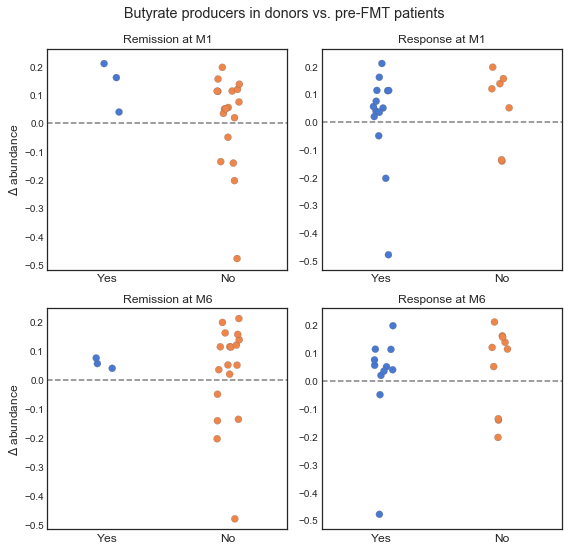

In [16]:
fig, AX = plt.subplots(2, 2, figsize=(8, 8))
AX = AX.flatten()

order=[True, False]

col = 'remission_m1'
ax = AX[0]
sns.stripplot(data=butyrate_goyal, x=col, y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2, ax=ax)
ax.set_ylabel('$\Delta$ abundance', fontsize='large')
ax.set_xlabel('')
ax.set_xticklabels(['Yes', 'No'], fontsize='large')
ax.axhline(0, c='gray', linestyle='--')
ax.set_title('Remission at M1')

col = 'response_m1'
ax = AX[1]
sns.stripplot(data=butyrate_goyal, x=col, y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['Yes', 'No'], fontsize='large')
ax.axhline(0, c='gray', linestyle='--')
ax.set_title('Response at M1')

col = 'remission_m6'
ax = AX[2]
sns.stripplot(data=butyrate_goyal, x=col, y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['Yes', 'No'], fontsize='large')
ax.axhline(0, c='gray', linestyle='--')
ax.set_title('Remission at M6')
ax.set_ylabel('$\Delta$ abundance', fontsize='large')

col = 'response_m6'
ax = AX[3]
sns.stripplot(data=butyrate_goyal, x=col, y='donor_minus_pt', 
              order=order, size=7, linewidth=0.2, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['Yes', 'No'], fontsize='large')
ax.axhline(0, c='gray', linestyle='--')
ax.set_title('Response at M6')

fig.suptitle('Butyrate producers in donors vs. pre-FMT patients', 
             fontsize='x-large', y=0.98)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('../../figures/final/supp1.butyrate_delta_abundance.goyal2018.png', dpi=150)

# All three on the same plot (as in main figure)

In [17]:
butyrate_jacob.head()

,sample_id_donor,sample_type_donor,donor_patient_donor,remission_w4,response_w4,patient_id,butyrate_abun_donor,sample_id_pt,sample_type_pt,donor_patient_pt,butyrate_abun_pt,donor_minus_pt
0,SRR5629088,donor,donor,No,No,1,0.168825,NaN,NaN,NaN,NaN,NaN
1,SRR5629090,donor,donor,No,No,2,0.142246,SRR5629106,Pre,patient,0.354549,-0.212303
2,SRR5629098,donor,donor,No,No,3,0.164350,SRR5629097,Pre,patient,0.248789,-0.084439
3,SRR5629104,donor,donor,No,Yes,24,0.135703,SRR5629152,Pre,patient,0.099277,0.036426
4,SRR5629107,donor,donor,No,Yes,4,0.130846,SRR5629112,Pre,patient,0.325555,-0.194708


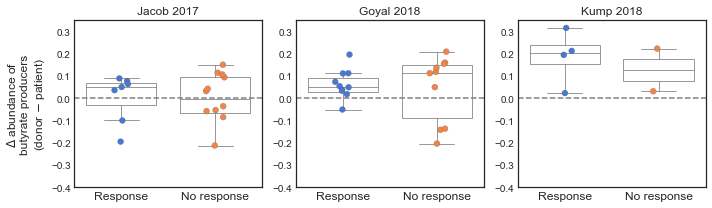

In [18]:
# Bottom panel: abundance of butyrate producers vs. FMT response
total_width = 10
height = 3

fig = plt.figure(figsize=(total_width, height))

gs = gridspec.GridSpec(nrows=1, ncols=3, 
                       wspace=0.5,
                       top=0.55, bottom=0.05)

boxprops = {'edgecolor': 'gray', 'facecolor': 'w', 'linewidth': 0.8}
lineprops = {'color': 'gray', 'linewidth': 0.8}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops,
                       'width': 0.75})

# Jacob 2017
ax = plt.subplot(gs[0])
ax.axhline(0, c='gray', linestyle='--')
sns.boxplot(data=butyrate_jacob, x='response_w4', y='donor_minus_pt', ax=ax,
              order=['Yes', 'No'],
            fliersize=0,
            **boxplot_kwargs)
sns.stripplot(data=butyrate_jacob, x='response_w4', y='donor_minus_pt', ax=ax,
              order=['Yes', 'No'],
              size=6, linewidth=0.2)
ax.set_title('Jacob 2017', fontsize='large')
ax.set_xlabel('')
ax.set_ylabel('$\Delta$ abundance of\nbutyrate producers\n(donor $\minus$ patient)', fontsize='large')
ax.set_xticklabels(['Response', 'No response'], fontsize='large')

ax.set_ylim([-0.4, 0.35])
#ax.set_yticks(ax.get_yticks()[::2])
#ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])


# Goyal 2018
ax = plt.subplot(gs[1])
ax.axhline(0, c='gray', linestyle='--')
sns.boxplot(data=butyrate_goyal, x='response_m6', y='donor_minus_pt', ax=ax,
            order=[True, False],
            fliersize=0,
            **boxplot_kwargs)
sns.stripplot(data=butyrate_goyal, x='response_m6', y='donor_minus_pt', ax=ax,
              order=[True, False],
              size=6, linewidth=0.2)
ax.set_title('Goyal 2018', fontsize='large')
ax.set_xlabel('')
ax.set_xticklabels(['Response', 'No response'], fontsize='large')

ax.set_ylim([-0.4, 0.35])
ax.set_ylabel('')
#ax.set_yticks(ax.get_yticks()[::2])
#ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])


# Kump 2018
ax = plt.subplot(gs[2])
ax.axhline(0, c='gray', linestyle='--')
sns.boxplot(data=butyrate_kump, x='Response', y='donor_minus_pt', ax=ax,
            order=['RE', 'NR'],
            fliersize=0,
            **boxplot_kwargs)
sns.stripplot(data=butyrate_kump, x='Response', y='donor_minus_pt', ax=ax,
              order=['RE', 'NR'],
              size=6, linewidth=0.2)
ax.set_title('Kump 2018', fontsize='large')
ax.set_xlabel('')
ax.set_xticklabels(['Response', 'No response'], fontsize='large')

ax.set_ylim([-0.4, 0.35])
ax.set_ylabel('')
#ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])

gs.tight_layout(fig)

fig.savefig('../../figures/final/suppfig.delta_butyrate_vs_response.png', dpi=150)